#### Perhaps consider https://github.com/bakrianoo/aravec or ArSphere

'jupyter' is not recognized as an internal or external command,
operable program or batch file.


'الصحة تعلن استمرار إعادة جدولة جرعات لقاح #كورونا وتوضح الأسباب.<LF> <LF>https://t.co/d1V6NVLNrG https://t.co/KAJJdWkIQM'

'الصحه تعلن استمرار اعاده جدوله جرعات لقاح كورونا وتوضح الاسباب'

'صحة تعل رار عدة جدل جرع لقح كورو وضح بب'

The average length of the tweets is:  19.44547796222095


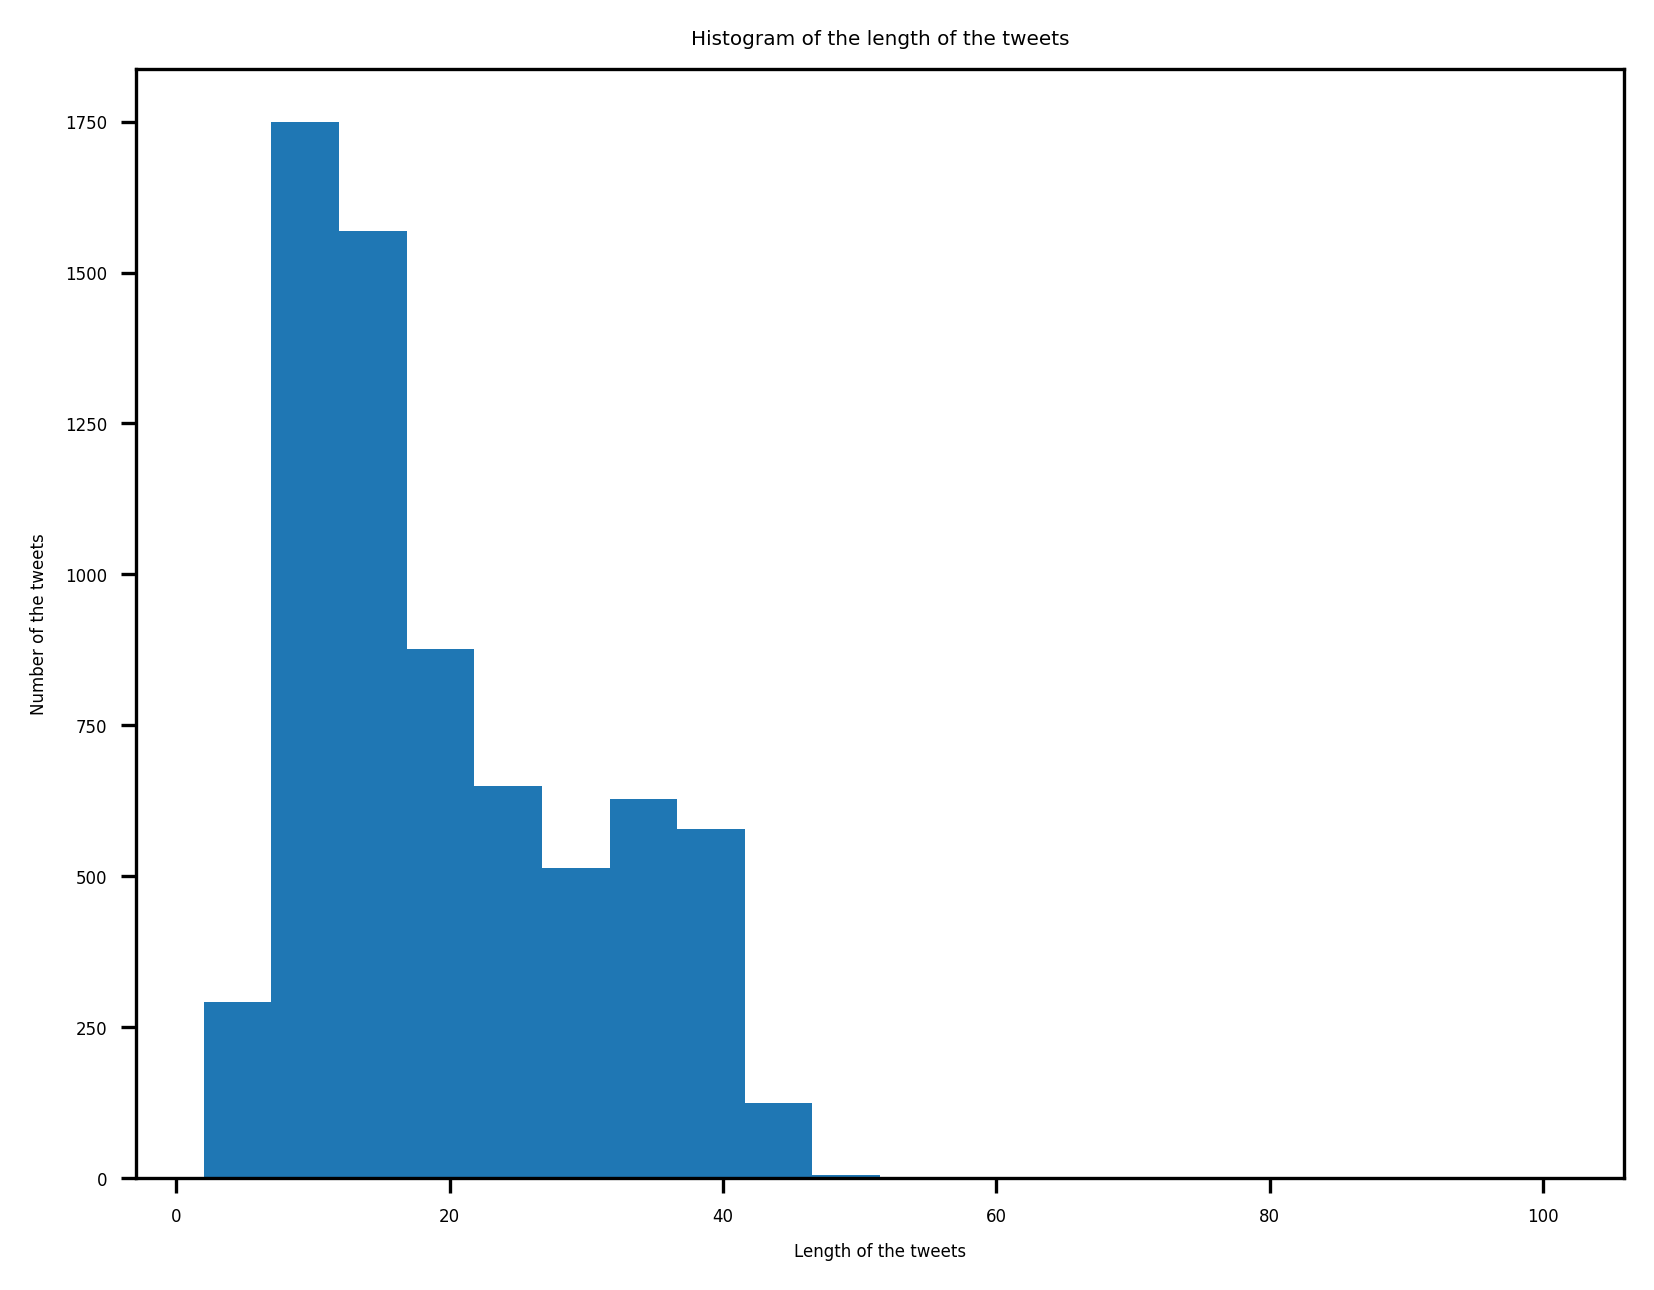

[('pad', 95665),
 ('لقاح', 7599),
 ('كورونا', 5151),
 ('علي', 2319),
 ('الجرعه', 1229),
 ('الصحه', 1158),
 ('اللقاح', 1155),
 ('ان', 1108),
 ('كوفيد', 975),
 ('الاولي', 962),
 ('يتلقي', 871),
 ('الي', 867),
 ('الله', 803),
 ('تطعيم', 778),
 ('فايزر', 756),
 ('فيروس', 708),
 ('جرعه', 705),
 ('ضد', 664),
 ('عاجل', 512),
 ('اليوم', 488)]

The size of the vocabulary is:  25593


In [1]:
%run ../../1-Preprocessing/Preprocessing/Preprocess.ipynb import x, y1, y2, X, Y1, Y2, vocabulary, Preprocessing

In [2]:
x = np.array([[word for word in tweet] for tweet in x])
X = np.array([[word for word in tweet] for tweet in X])

Features = {"method": "Word Embeddings Aravec"}

In [5]:
from gensim.models import Word2Vec

vocab_size = len(vocabulary)
w2v_embeddings_index={}
TOTAL_EMBEDDING_DIM=200
w2v_model = Word2Vec.load('../../2-FeatureExtraction/WordEmbeddings/aravec/full_grams_cbow_300_twitter.mdl')
for word in w2v_model.wv.index_to_key:
    w2v_embeddings_index[word] = w2v_model.wv.get_index(word)
    # print(word)
    # print(w2v_embeddings_index[word])
    # .
    # 0
    # %
    # 1
    # :
    # 2
    # من
    # 3
    # #
    # 4
    # رابطويب
    # 5
    # في
    # 6
print('Loaded %s word vectors.'% len(w2v_embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix_x = np.zeros((x.shape[0], TOTAL_EMBEDDING_DIM))
embedding_matrix_X = np.zeros((X.shape[0], TOTAL_EMBEDDING_DIM))

for tweet in x:
    for i, word in enumerate(tweet):
        if word not in w2v_embeddings_index:
            if word != 'pad':
                embedding_vector = w2v_embeddings_index['وباء']
        else:    
            embedding_vector = w2v_embeddings_index[word]
            # print(type(embedding_vector)) # <class 'int'>
            if embedding_vector is not None:
                embedding_matrix_x[i] = embedding_vector

for tweet in X:
    for i, word in enumerate(tweet):
        if word not in w2v_embeddings_index:
            if word != 'pad':
                embedding_vector = w2v_embeddings_index['وباء']
        else:    
            embedding_vector = w2v_embeddings_index[word]
            # print(type(embedding_vector)) # <class 'int'>
            if embedding_vector is not None:
                embedding_matrix_X[i] = embedding_vector

print('Embedding Matrix x shape:', embedding_matrix_x.shape)
print('Embedding Matrix X shape:', embedding_matrix_X.shape)

Loaded 1476715 word vectors.
Embedding Matrix x shape: (6988, 200)
Embedding Matrix X shape: (1000, 200)


In [6]:
aravec_embeds_x = np.array([[embedding_matrix_x[i] for i, word in enumerate(tweet)] for tweet in x])
aravec_embeds_X = np.array([[embedding_matrix_X[i] for i, word in enumerate(tweet)] for tweet in X])

print(aravec_embeds_x)
print(aravec_embeds_x.shape)

[[[28317. 28317. 28317. ... 28317. 28317. 28317.]
  [ 6927.  6927.  6927. ...  6927.  6927.  6927.]
  [ 1963.  1963.  1963. ...  1963.  1963.  1963.]
  ...
  [18619. 18619. 18619. ... 18619. 18619. 18619.]
  [  451.   451.   451. ...   451.   451.   451.]
  [ 3638.  3638.  3638. ...  3638.  3638.  3638.]]

 [[28317. 28317. 28317. ... 28317. 28317. 28317.]
  [ 6927.  6927.  6927. ...  6927.  6927.  6927.]
  [ 1963.  1963.  1963. ...  1963.  1963.  1963.]
  ...
  [18619. 18619. 18619. ... 18619. 18619. 18619.]
  [  451.   451.   451. ...   451.   451.   451.]
  [ 3638.  3638.  3638. ...  3638.  3638.  3638.]]

 [[28317. 28317. 28317. ... 28317. 28317. 28317.]
  [ 6927.  6927.  6927. ...  6927.  6927.  6927.]
  [ 1963.  1963.  1963. ...  1963.  1963.  1963.]
  ...
  [18619. 18619. 18619. ... 18619. 18619. 18619.]
  [  451.   451.   451. ...   451.   451.   451.]
  [ 3638.  3638.  3638. ...  3638.  3638.  3638.]]

 ...

 [[28317. 28317. 28317. ... 28317. 28317. 28317.]
  [ 6927.  6927.  69